# Carolyn's scratch notebook to work through toilet data


In [1]:
#load libraries

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

### Import Data from LA Parks and LA CAN

In [15]:
#had trouble locating the files so needed to do some file digging
#import os
#os.getcwd()

In [16]:
#os.listdir()

In [17]:
#os.listdir('../03_Data/LACAN Data')

In [18]:
# upload park bathroom data
parks = pd.read_csv('../03_Data/MiscData/parks_with_latlon.csv')

#upload LACan bathroom, handwashing stations, etc data
lacan = pd.read_csv('../03_Data/LACAN Data/allstations_LACAN.csv')

#upload LA Library bathroom data
libraries = pd.read_csv('../03_Data/MiscData/lalibraries.csv')

In [19]:
libraries.head()

,Unnamed: 0,branch_name,latitude,longitude,type,geometry
0,0,Anthony Quinn,34.0408,-118.180,LA County Library,POINT (-118.18 34.0408)
1,5,City Terrace,34.0557,-118.178,LA County Library,POINT (-118.178 34.0557)
2,8,East Los Angeles,34.0337,-118.160,LA County Library,POINT (-118.16 34.0337)
3,9,El Camino Real,34.0237,-118.178,LA County Library,POINT (-118.178 34.0237)
4,25,A C Bilbrew,33.9158,-118.272,LA County Library,POINT (-118.272 33.9158)


In [21]:
# convert to geodataframes and project
parksGdf = gpd.GeoDataFrame(parks, geometry=gpd.points_from_xy(parks.lon, parks.lat, 
                                                               crs='EPSG:4326'))

lacanGdf = gpd.GeoDataFrame(lacan, geometry=gpd.points_from_xy(lacan.X, lacan.Y, 
                                                               crs='EPSG:4326'))

librariesGdf = gpd.GeoDataFrame(libraries, geometry=gpd.points_from_xy(libraries.longitude, libraries.latitude, 
                                                               crs='EPSG:4326'))

### Prepare data to concatonate
First, begin with parks data. Drop unnecessary columns and add a column to label it as 'LA Parks' so we know where that data come from.

In [22]:
#drop unnecessary columns
parksGdf = parksGdf.drop(columns=['Unnamed: 0', 'address', 'lat', 'lon'])


In [23]:
#add a column to specify type
parksGdf['type'] = 'LA Parks'

#rearrange columns if necessary - in this case, not necessary
#parksGdf = parksGdf[['name', 'geometry', 'type']]

In [25]:
parksGdf.head()

,name,geometry,type
0,Augustus F. Hawkins Natural Park,POINT (-118.24786 34.01386),LA Parks
1,Bird Sanctuary,POINT (-118.29180 34.10518),LA Parks
2,Bishop Canyon,POINT (-118.23659 34.07990),LA Parks
3,Brand Park,POINT (-118.46116 34.27229),LA Parks
4,Branford Recreation Center,POINT (-118.42319 34.23351),LA Parks


In [26]:
#drop unnecessary columns from LACAN
lacanGdf = lacanGdf.drop(columns=['X', 'Y', 'description', 'gx_media_links'])

In [27]:
#rearrange columns
lacanGdf = lacanGdf[['name', 'geometry', 'type']]

In [28]:
lacanGdf.head()

,name,geometry,type
0,Stanford Avenue & 7th Street,POINT (-118.24444 34.03898),LAHSA Handwashing Station
1,East 5th Street & Crocker Street,POINT (-118.24277 34.04351),LAHSA Handwashing Station
2,Stanford Avenue & 5th Street,POINT (-118.24110 34.04265),LAHSA Handwashing Station
3,5th / San Pedro,POINT (-118.24375 34.04405),LAHSA Handwashing Station
4,San Pedro Street & 6th Street,POINT (-118.24535 34.04199),LAHSA Handwashing Station


In [30]:
#drop unnecessary columns
librariesGdf = librariesGdf.drop(columns=['Unnamed: 0', 'latitude', 'longitude'])

In [32]:
#rearrange columns
librariesGdf = librariesGdf[['branch_name', 'geometry','type']]

In [33]:
librariesGdf.head()

,branch_name,geometry,type
0,Anthony Quinn,POINT (-118.18000 34.04080),LA County Library
1,City Terrace,POINT (-118.17800 34.05570),LA County Library
2,East Los Angeles,POINT (-118.16000 34.03370),LA County Library
3,El Camino Real,POINT (-118.17800 34.02370),LA County Library
4,A C Bilbrew,POINT (-118.27200 33.91580),LA County Library


### Concatenate

In [34]:
#concatenate the two gdfs
publictoilets = pd.concat([parksGdf, lacanGdf, librariesGdf], axis=0)

In [35]:
publictoilets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 374 entries, 0 to 82
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         291 non-null    object  
 1   geometry     374 non-null    geometry
 2   type         374 non-null    object  
 3   branch_name  83 non-null     object  
dtypes: geometry(1), object(3)
memory usage: 14.6+ KB


In [38]:
publictoilets = publictoilets.to_crs('EPSG:4326')

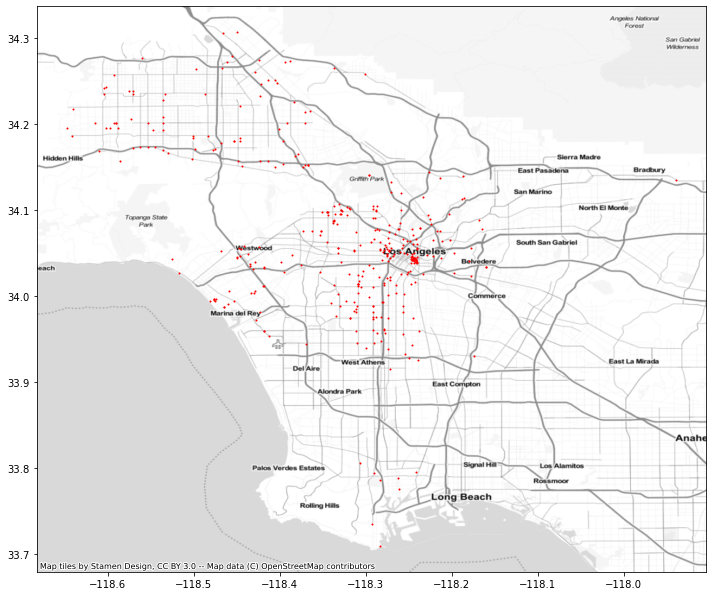

In [41]:
import contextily as ctx
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,12))

publictoilets.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
#ax.axis('off')

# add a basemap
ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)

### Save a geojson file of my gdf

In [43]:
import fiona
publictoilets.to_file("alltoilets.geojson", driver='GeoJSON')

/Users/carolynchu/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Imported data from the "MyGeodataCloud" website

I imported and looked at this dataset that welisted in our original proposal. While there were many points, they were not well-defined. We didn't understand where this toilet data came from, who managed those restrooms, etc. We ultimately decided not to include it in our final dataset.

In [ ]:
#geotoiletsGdf = gpd.read_file('MyGeodataCloud_data/toilets_point.geojson')

In [ ]:
#geotoiletsGdf.info()

In [ ]:
#geotoiletsGdf.head()

### Mapping the toilets
I tried mapping the data we do have. I think there's an issue with the projection...the contextily basemap isn't loading. >:(

# A wasteland of code
I initially tried scraping the LA Parks website to no avail. Ultimately I went with a much simpler path with retrieving park bathrooms data....

## Section 1. Attempts to scrape restroom data from LA Parks

I'm mostly trying to follow the lecture notebook for '7 Scraping Craigslist'

In [ ]:
# using the laparks.org page for Gladys Park which I confirmed has restrooms
import requests
from bs4 import BeautifulSoup

url = 'https://www.laparks.org/park/6th-gladys-street'
r = requests.get(url)

soup = BeautifulSoup(r.content)
print(soup.prettify())


In [ ]:
restrooms = soup.find_all(class_ = 'field field-name-field-public-info field-type-text-long field-label-above')
print(len(restrooms))

In [ ]:
restrooms[0]

In [ ]:
print(restrooms[0].find('div', class_= 'field-item even').text)

In [ ]:
hours = soup.find_all(class_ = 'field field-name-field-hours-of-operation field-type-text-long field-label-above')
print(len(hours))

In [ ]:
print(hours[0].find('div', class_= 'field-item even').text)

In [ ]:
# skipped a step in the lecture notebook about getting the URL
#will have to come back to it

In [ ]:
import pandas as pd
restroomList = [] # empty list that we can append to

for restroom in restrooms:

## Section 1.2 More Park stuff

In [ ]:
park_url = 'https://www.laparks.org/park/encino'
r = requests.get(park_url)
soup = BeautifulSoup(r.content)
print(soup.prettify())

In [ ]:
restrooms = soup.find_all(class_= 'field-label')
print (len(restrooms))

In [ ]:
restrooms [0]

In [ ]:
restrooms [1]

In [ ]:
restrooms[2]

In [ ]:
restrooms [3]

In [ ]:
restrooms [4]

In [ ]:
restrooms[5]

In [ ]:
restrooms[6]

In [ ]:
restrooms [7]

In [ ]:
restrooms[8]

In [ ]:
print(restrooms[6].find('div', class_= 'field-label').text)

In [ ]:
libraries = 'https://lapl.org/branches'
rlibraries = requests.get(libraries)
soup = BeautifulSoup(rlibraries.content)
print(soup.prettify())

## Section 3. County Library Data API
This code works, but not ultimately needed for this notebook.

In [ ]:
#First I will create a pandas dataframe (countylib) of all LA County Library locations, including their name, hours, and the other information that is returned from the branch information API.

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

results = client.get("a4nt-4gca", limit=2000)

countylib = pd.DataFrame.from_records(results)

In [ ]:
countylib.info()

In [ ]:
#geojson
import json
import requests
import pandas as pd

r = requests.get('https://data.lacounty.gov/resource/nrtn-ga3s.geojson')
library = r.json()
df = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df.head()
https://data.lacounty.gov/resource/nrtn-ga3s.geojson

In [ ]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacounty.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacounty.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("nrtn-ga3s", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
results_df.info()

In [ ]:
results_df.head()